# Python API examples of the package `tracking_physmed`

## `tracking_physmed`
The package is built in the following way:
- The main class called `Tracking` reads the `.h5` file generated by [DeepLabCut](https://github.com/DeepLabCut/DeepLabCut).
- There is a `plotting` module with a lot of different plots (to plot speed, 2D position, likelihood of the tracking response, head direction, x or y position, etc.) with different options (DLC label, with or without animation, etc.)
- There is also a GUI module that is used by `Tracking` one some occasions, mainly to add some important information to the metadata.

To instantiate a `Tracking` class, we need to use the `load_tracking` function.  
The function needs at least the tracking filename and it will try to find the metadata and the video associated with the filename in the same folder.  
The metadata filename and the labeled video filename can be passed as arguments as well.

In [1]:
from tracking_physmed.tracking import load_tracking
from pathlib import Path

# typical tracking file
tracking_path = Path(r"./tests/example_data/sub-rat2306/ses-20210727/beh/sub-rat2306_ses-20210727_type-exp_tracking-filtered_beh.h5")

trk = load_tracking(tracking_path)

### `Tracking`
The class has some DLC information as its attribute:

In [2]:
print(
    f"Video filepath: {trk.video_filepath}\n"
    f"Metadata filepath: {trk.metadata_filename}\n"
    f"Bodyparts: {trk.bodyparts}\n"
    f"Video fps: {trk.fps}\n"
    f"Number of frames: {trk.nframes}"
)

Video filepath: None
Metadata filepath: C:\Users\felip\Work\Repos\tracking_physmed\tests\example_data\sub-rat2306\ses-20210727\beh\sub-rat2306_ses-20210727_type-exp_tracking-meta_beh.pickle
Bodyparts: ['body', 'neck', 'probe', 'snout', 'tailbase']
Video fps: 50.0
Number of frames: 36028


And some main information right out of the box:

In [3]:
trk.print_infos()

--------------------------------------------------------------
Total tracking time: 720.56 s
Total running time: 399.44 s
Total distance run: 4017.05 cm
Running time ratio (running time / all time): 0.55
Exploration ratio (ratio of visited bins): 0.880
Exploration std (std of visits on each bin): 1382.963
Mean running speed (only running periods): 10.06 cm/s
Mean running speed: 6.55 cm/s
--------------------------------------------------------------


The position of the labels in DLC are obviouly in terms of pixels. We need to let the `Tracking` class know how to transform it to centimeters or meters, if that's what we want.  
This can be done with `set_ratio_coords()` and it will prompt you a GUI to select the corner of the square or rectangle in the video.  
The coordinates can alse be set by `set_ratio_coords(coord_list=[[top_left_x, top_left_y],[top_right_x, top_right_y],[bottom_left_x, bottom_left_y],[bottom_right_x, bottom_right_y]])`  
This coordinates will calculate the cm2px ratio calculating the distance between the coordinates and the parameter `Tracking.w` and `Tracking.h` that are initiated as 100 and can be changed

\* Note: For now this can only do rectangular shaped arenas. (maybe circular ones in the future?)

Error opening video stream or file


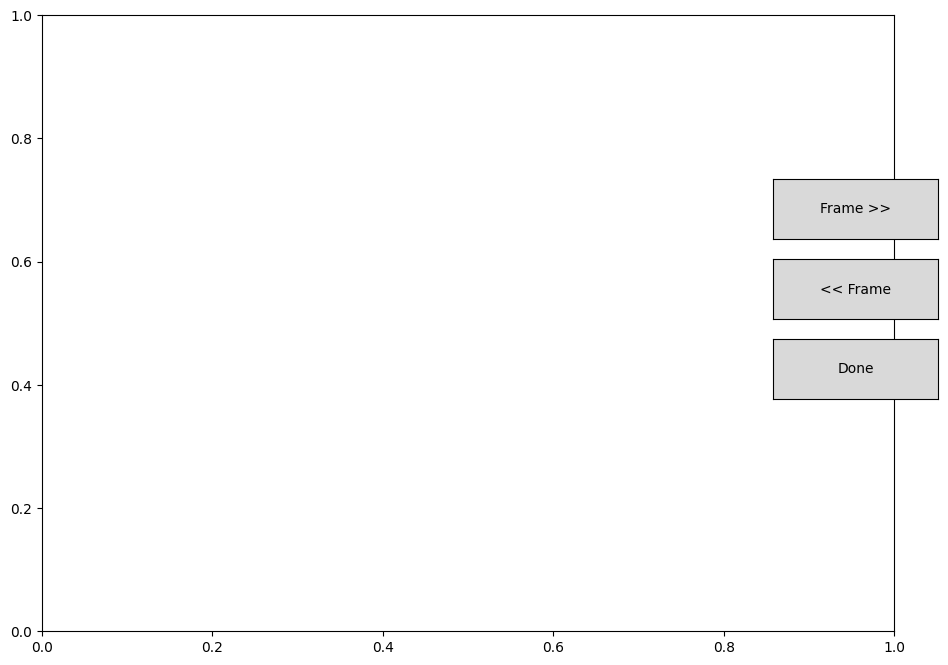

In [4]:
trk.w = 100
trk.h = 150
trk.set_ratio_coords()

Also, by default, the spatial unit used is centimeter, but it can be change to meters, milimeters or back to pixels, using the property `spatial_units`

In [5]:
trk.spatial_units = "px"
print(trk.ratio_per_pixel, trk.spatial_units + "/px")
trk.spatial_units = "m"
print(trk.ratio_per_pixel, trk.spatial_units + "/px")
trk.spatial_units = "mm"
print(trk.ratio_per_pixel, trk.spatial_units + "/px")
trk.spatial_units = "cm"
print(trk.ratio_per_pixel, trk.spatial_units + "/px")

1 px/px
0.027565296465138413 m/px
2.756529646513841 mm/px
0.2756529646513841 cm/px


The actual data recovered from the `.h5` file is in the attribute `Dataframe`

In [7]:
trk.Dataframe[:10]

scorer    DLC_effnet_b3_locomotion_HpcSep13shuffle4_50000             \
bodyparts                                            body              
coords                                                  x          y   
0                                              375.937347  49.745781   
1                                              376.802979  50.525898   
2                                              377.878906  51.939510   
3                                              378.073029  52.099018   
4                                              378.590698  52.282921   
5                                              378.857269  52.559895   
6                                              379.354553  52.887455   
7                                              379.473083  52.893959   
8                                              379.473083  53.032799   
9                                              379.473083  53.065781   

scorer                                                                         \
bodyparts                   neck                             probe              
coords    likelihood           x          y likelihood           x          y   
0           0.999988  383.996246  78.793274   0.999997  386.422852  87.886169   
1           0.999994  384.133087  79.620255   0.999993  386.453339  88.479553   
2           0.999997  384.133087  80.603592   0.999992  386.581879  89.801910   
3           0.999997  384.133087  81.574303   0.999994  386.609467  90.654152   
4           0.999997  384.133087  81.582993   0.999995  386.755524  90.654152   
5           0.999997  384.224823  81.717422   0.999994  386.859161  90.654152   
6           0.999998  384.224823  81.717422   0.999994  386.859161  90.656693   
7           0.999998  384.224823  81.717422   0.999992  386.859161  90.735573   
8           0.999998  384.224823  81.793594   0.999993  387.070435  90.750748   
9           0.999998  384.302338  81.833778   0.999994  387.246277  90.816971   

scorer                                                                         \
bodyparts                  snout                          tailbase              
coords    likelihood           x          y likelihood           x          y   
0           0.999999  390.153290  94.686638   0.999939  360.249359  40.617928   
1           0.999998  390.589081  95.205231   0.999929  361.513153  40.617928   
2           0.999999  390.635101  96.456337   0.999972  362.766327  40.617928   
3           0.999998  390.703064  96.456337   0.999962  363.339569  40.617928   
4           0.999998  390.781891  96.456337   0.999962  363.894409  40.617928   
5           0.999998  390.925659  96.456337   0.999965  364.961426  40.671204   
6           0.999999  391.117218  96.456337   0.999977  366.277008  40.706169   
7           0.999999  391.495392  96.456337   0.999977  366.297729  40.706169   
8           0.999999  391.614197  96.395287   0.999975  366.297729  40.706169   
9           0.999999  391.854340  96.167107   0.999973  366.297729  40.706169   

scorer                
bodyparts             
coords    likelihood  
0           0.999964  
1           0.999979  
2           0.999988  
3           0.999986  
4           0.999986  
5           0.999981  
6           0.999981  
7           0.999979  
8           0.999983  
9           0.999979

What you will want to use for the analysis are the "get methods" that can be found here

In [8]:
get_methods = [m for m in dir(trk) if m.startswith("get")]
print(get_methods)

['get_binned_position', 'get_degree_interval_hd', 'get_direction_angular_velocity', 'get_direction_array', 'get_direction_histogram', 'get_grid_field_array', 'get_index', 'get_infos', 'get_place_field_array', 'get_position_x', 'get_position_y', 'get_proximity_from_center', 'get_proximity_from_corner', 'get_proximity_from_wall', 'get_running_bouts', 'get_speed', 'get_xy_coords']


In [9]:
trk.get_speed?

Signature:
trk.get_speed(
    bodypart='body',
    axis='xy',
    euclidean_distance=False,
    smooth=True,
    speed_cutout=0,
    only_running_bouts=False,
)
Docstring:
Gets speed for given `bodypart`. When getting the distance between frames, the first index is hard set to be 0 so that the output array has the same length as the number of frames.

Parameters
----------
bodypart : str, optional
    Name of the label to get the speed from, by default 'body'.
axis : str, optional
    To compute Vx, Vy or V, axis is 'x', 'y' or 'xy', respectively. By default 'xy'.
euclidean_distance : bool, optional
    If ``axis`` is only one dimension, the distance can be the euclidean (absolute) or real. By default False.
smooth : bool, optional
    If True a Gaussian window will convolve the speed array, by default True.
    The parameters of the Gaussian window can be set via the self.speed_smooth_window variable.
speed_cutout : int, optional
    If given it will set the speed values under this th

### `plotting`

To plot things we have the `plotting` module with most of the important plots you want to analyse the data

In [10]:
from tracking_physmed import plotting
import matplotlib.pyplot as plt

plot_methods = [m for m in dir(plotting) if m.startswith("plot")]
print(plot_methods)

['plot_center_proximity', 'plot_corner_proximity', 'plot_head_direction', 'plot_head_direction_interval', 'plot_likelihood', 'plot_occupancy', 'plot_position', 'plot_position_2d', 'plot_position_x', 'plot_position_y', 'plot_running_bouts', 'plot_speed', 'plot_wall_proximity']


In [11]:
plotting.plot_speed?

Signature:
plotting.plot_speed(
    Trk_cls,
    bodypart='body',
    speed_axis='xy',
    euclidean=False,
    smooth=True,
    speed_cutout=0,
    only_running_bouts=False,
    ax=None,
    fig=None,
    figsize=(12, 6),
    animate_video=False,
    animate_fus=False,
    **ax_kwargs,
)
Docstring:
Plot speed of given label.

Parameters
----------
Trk_cls : :class:`tracking_physmed.tracking.Tracking` instance
bodypart : str, optional
    Bodypart label. Default is "body"
smooth : bool, optional
    If speed array is to be smoothed using a gaussian kernel. Default is ``True``.
speed_cutout : int, optional
    If speed is to be thresholded by some value. Default is 0
only_running_bouts : bool, optional
    If should plot only the running periods using :class:`tracking_physmed.tracking.Tracking.get_running_bouts` function. Default is ``False``.
ax : matplotlib Axes, optional
    If None, new axes is created in `fig`. Default is ``None``.
figsize : tuple, optional
    Figure size, if `fig

(<Figure size 1400x700 with 1 Axes>,
 <Axes: xlabel='time (s)', ylabel='Proximity from left wall (a.u)'>)

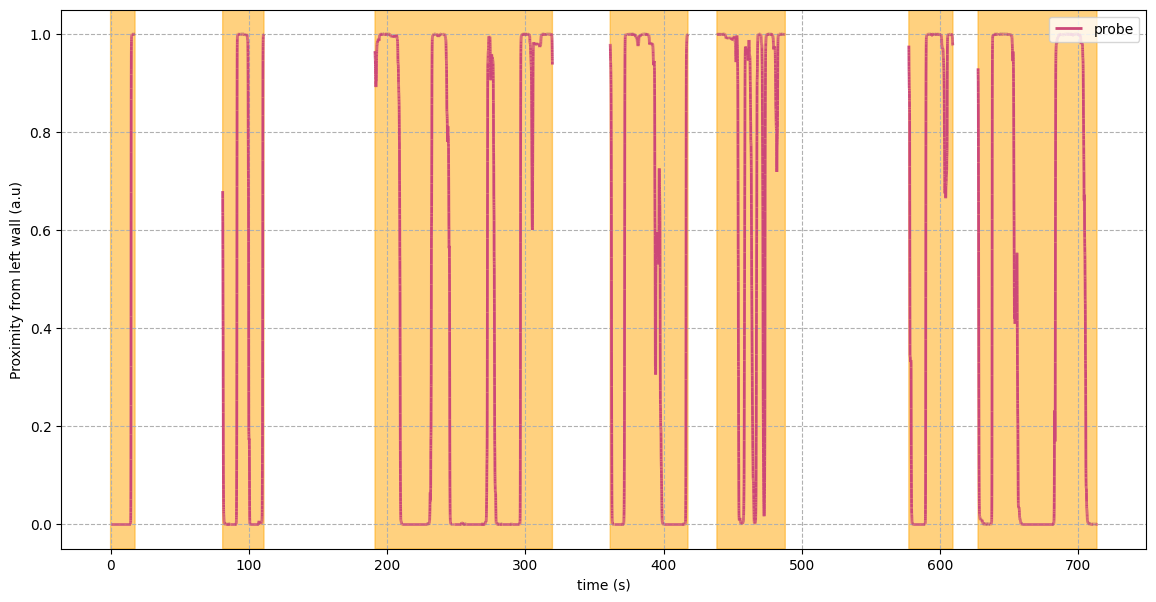

In [12]:
plotting.plot_wall_proximity(trk, wall="left", only_running_bouts=True)

(<Figure size 1200x600 with 1 Axes>, <Axes: xlabel='time (s)', ylabel='cm/s'>)

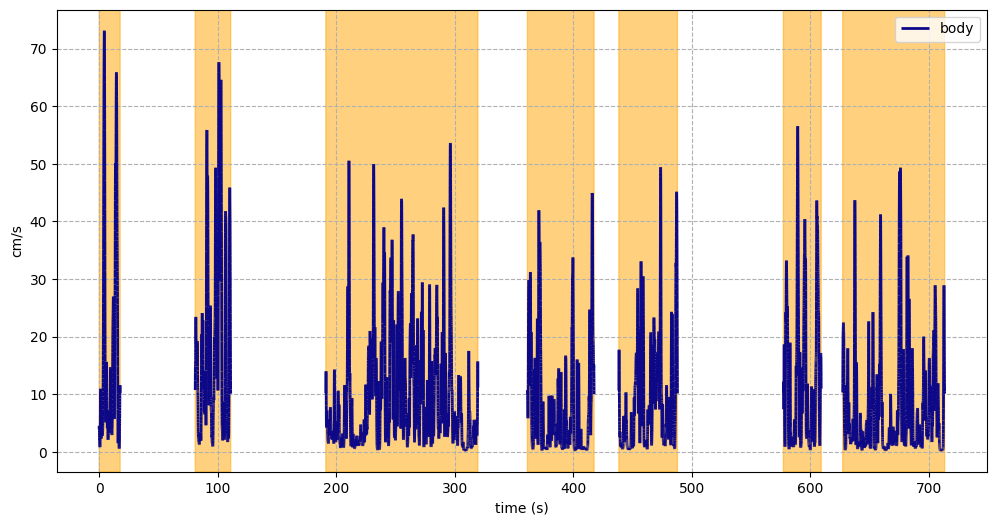

In [13]:
plotting.plot_speed(trk, only_running_bouts=True)